In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data
app=pd.read_csv('Largest_Companies.csv')
app.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [3]:
app.isna().sum()
#Dataset doesn't have missing values.

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [4]:
app.columns

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth',
       'Employees', 'Headquarters'],
      dtype='object')

In [5]:
app.info()
#Dataset has 7 features and 100 samples. 6 of these features object and Rank feature numeric but although 
#the Revenue,Revenue Growth and Employees features appear as objects, 
#they are essentially numerical features. These features can will be convert numeric.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [6]:
app.describe()

,Rank
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [7]:
#describe about all the features
app.describe(include="all")

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100.000000,100,100,100,100,100,100
unique,NaN,100,38,99,92,97,76
top,NaN,Walmart,Financials,"47,194",9.4%,"50,000","New York City, New York"
freq,NaN,1,11,2,2,2,12
mean,50.500000,NaN,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,25.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,50.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,75.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#to know about individual feature(unique,mean,std,min,max.....)
app['Employees'].nunique()

97

In [11]:
#size of dataframe
app.shape

(100, 7)

In [12]:
#to drop/remove a column(headquarters)
app.drop(['Headquarters'], axis=1, inplace=True)

In [13]:
#after dropping size of dataframe
app.shape

(100, 6)

In [14]:
# convert numeric value to aprropriate data type
app['Revenue (USD millions)'] = app['Revenue (USD millions)'].str.replace(',','').astype(int)
#Revenue,Revenue Growth and Employees features appear as objects, they are essentially numerical features.


In [15]:
app['Revenue growth']=app['Revenue growth'].str.replace('%','').astype(float)

In [16]:
app['Employees']=app['Employees'].str.replace(',','').astype(int)

In [17]:
app.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees
0,1,Walmart,Retail,611289,6.7,2100000
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000
3,4,Apple,Electronics industry,394328,7.8,164000
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000


In [18]:
app_top_10_companies=app.head(10)

In [19]:
app_top_10_companies

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees
0,1,Walmart,Retail,611289,6.7,2100000
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000
3,4,Apple,Electronics industry,394328,7.8,164000
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000
5,6,CVS Health,Healthcare,322467,10.4,259500
6,7,Berkshire Hathaway,Conglomerate,302089,9.4,383000
7,8,Alphabet,Technology,282836,9.8,156000
8,9,McKesson Corporation,Health,276711,4.8,48500
9,10,Chevron Corporation,Petroleum industry,246252,51.6,43846


In [20]:
top_comp=app_top_10_companies

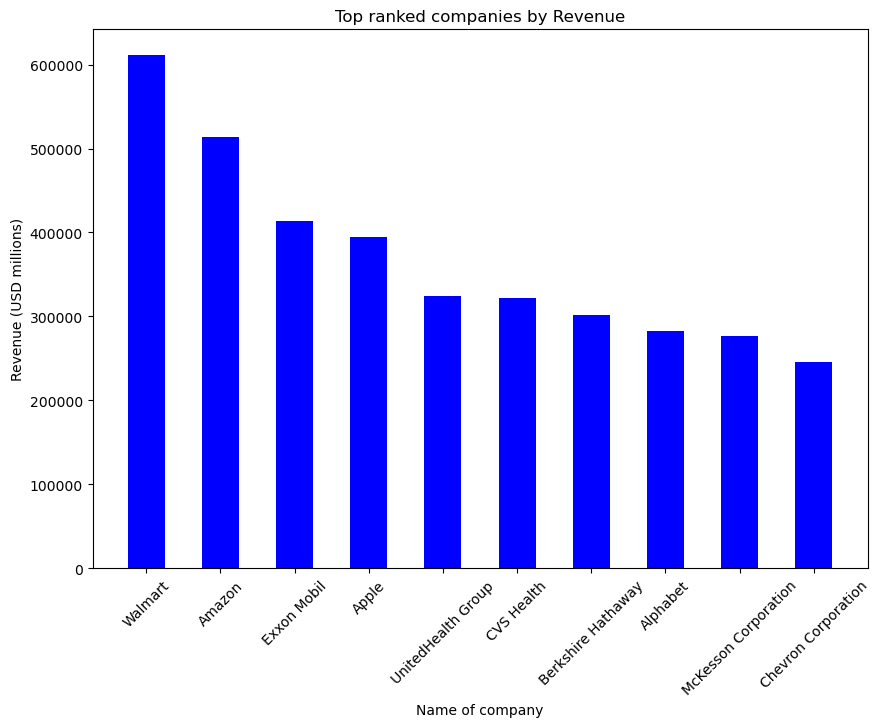

In [21]:
#analysis of top 10 companies using bar plot , to find top ranked campanies
plt.figure(figsize=(10,7))
plt.bar(top_comp['Name'],top_comp['Revenue (USD millions)'], color='blue', width=0.5)
plt.xlabel("Name of company")
plt.ylabel("Revenue (USD millions)")
plt.title("Top ranked companies by Revenue")
plt.xticks(rotation=45)
plt.show()

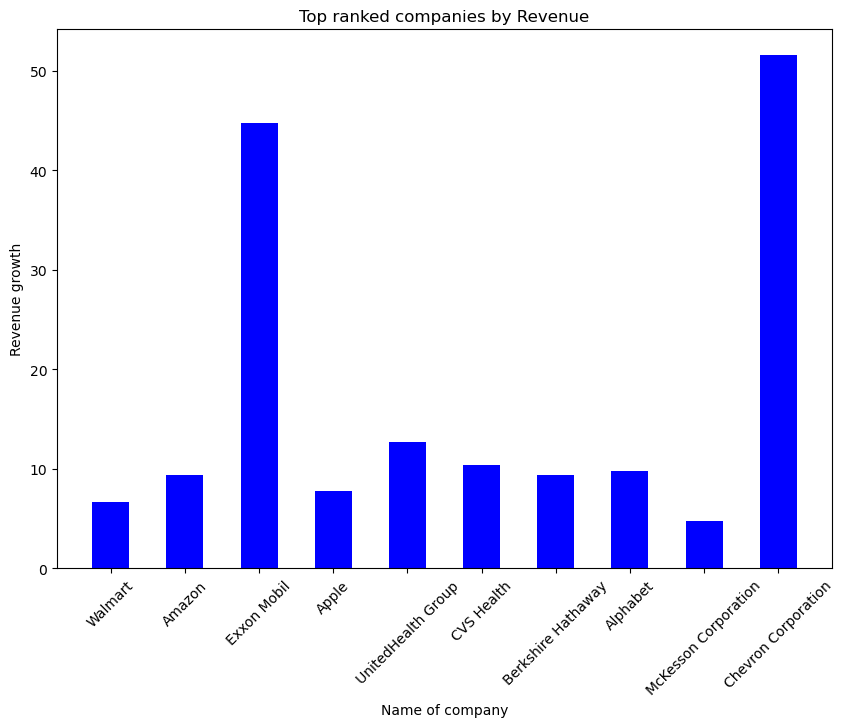

In [22]:
plt.figure(figsize=(10,7))
plt.bar(top_comp['Name'],top_comp['Revenue growth'], color='blue', width=0.5)
plt.xlabel("Name of company")
plt.ylabel("Revenue growth")
plt.title("Top ranked companies by Revenue")
plt.xticks(rotation=45)
plt.show()

In [23]:
highest_rev_idx = app["Revenue (USD millions)"].idxmax()
app.loc[highest_rev_idx]

Rank                            1
Name                      Walmart
Industry                   Retail
Revenue (USD millions)     611289
Revenue growth                6.7
Employees                 2100000
Name: 0, dtype: object

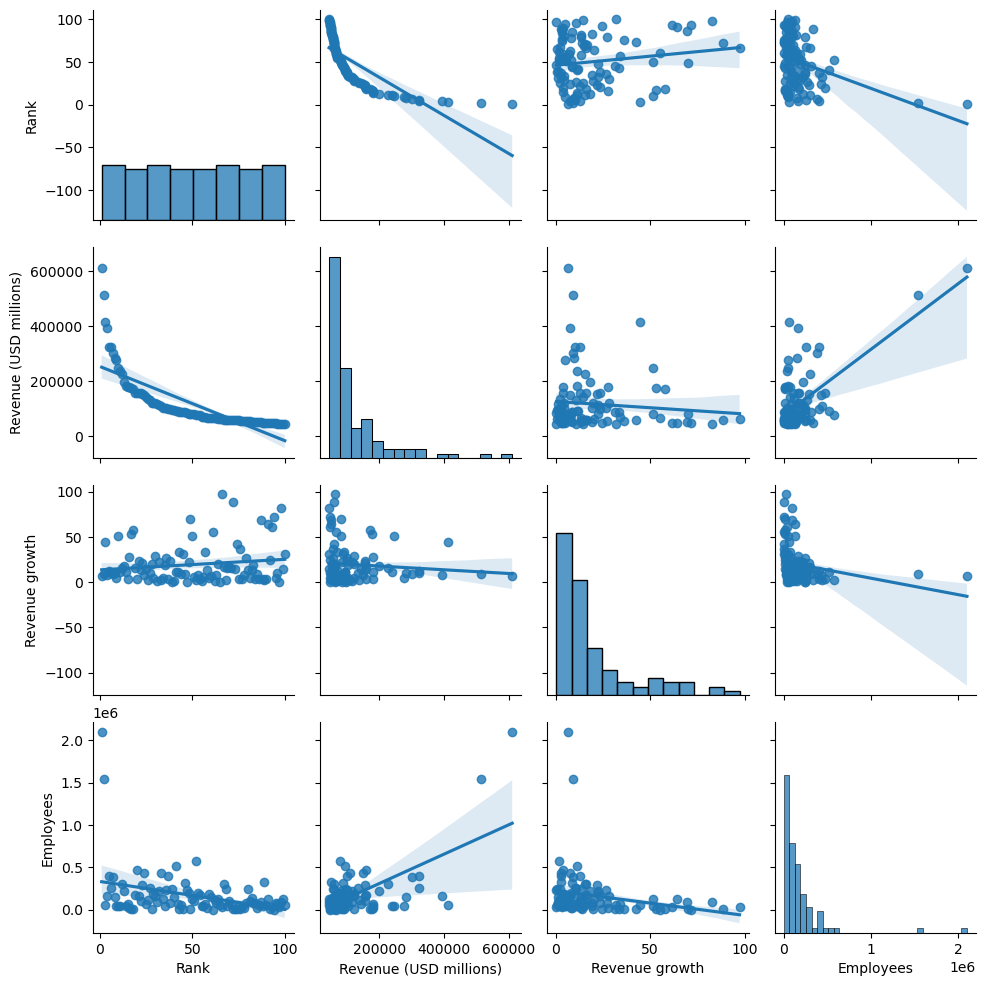

In [24]:
sns.pairplot(app, kind = "reg")

In [25]:
app.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees
0,1,Walmart,Retail,611289,6.7,2100000
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000
3,4,Apple,Electronics industry,394328,7.8,164000
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000


In [26]:
top_10_employees=app.nlargest(10,'Employees')

In [27]:
top_10_employees

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees
0,1,Walmart,Retail,611289,6.7,2100000
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000
51,52,United States Postal Service,Logistics,78620,2.0,576000
40,41,FedEx,Transportation,93512,11.4,518249
19,20,The Home Depot,Retail,157403,4.1,471600
32,33,Target Corporation,Retail,109120,2.9,440000
23,24,Kroger,Retail,148258,7.5,430000
36,37,United Parcel Service,Transportation,100338,3.1,404700
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000
6,7,Berkshire Hathaway,Conglomerate,302089,9.4,383000


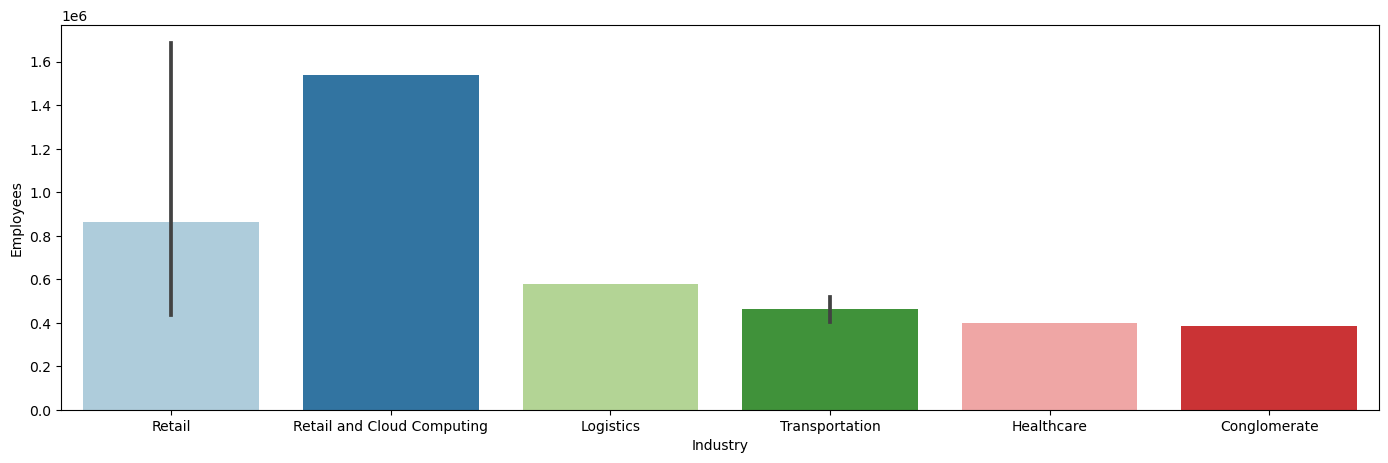

In [28]:
plt.figure(figsize = (17,5))
with sns.color_palette("Paired"):
    sns.barplot(y = 'Employees', x = 'Industry', data = top_10_employees)

<Axes: xlabel='Industry', ylabel='Employees'>

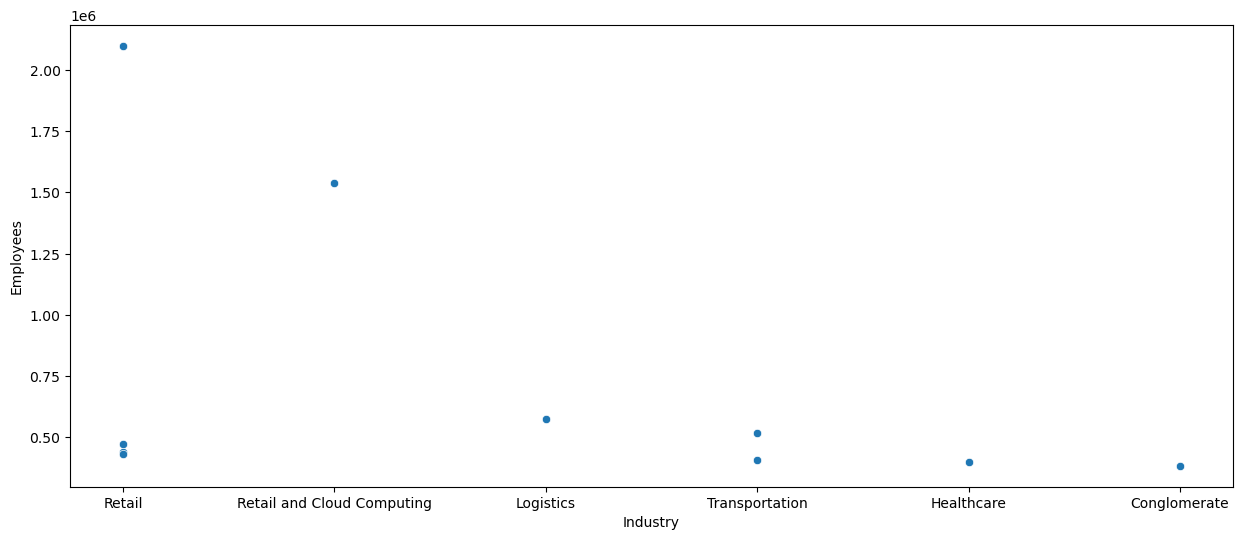

In [29]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Industry', y='Employees', data= top_10_employees)

In [30]:
top_5_industry = app.Industry.value_counts().head()

In [31]:
top_5_industry

Financials                 11
Retail                     10
Petroleum industry         10
Technology                  8
Pharmaceutical industry     7
Name: Industry, dtype: int64

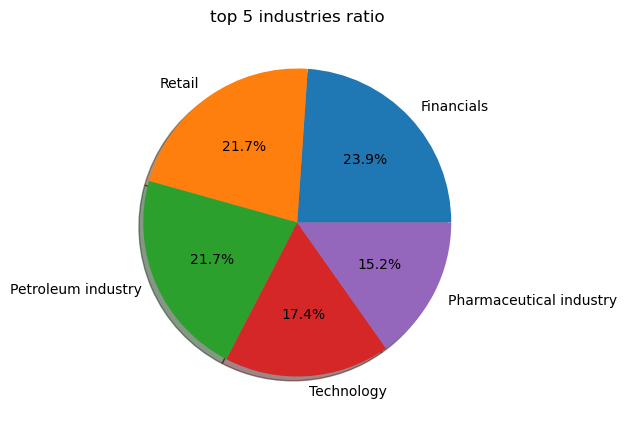

In [32]:
top_5_industry = [11,10,10,8,7]
lst = ['Financials','Retail','Petroleum industry','Technology','Pharmaceutical industry']
plt.figure(figsize=(12,5))
plt.pie(top_5_industry, labels=lst, shadow=True,autopct='%1.1f%%')
plt.title('top 5 industries ratio')
plt.show()

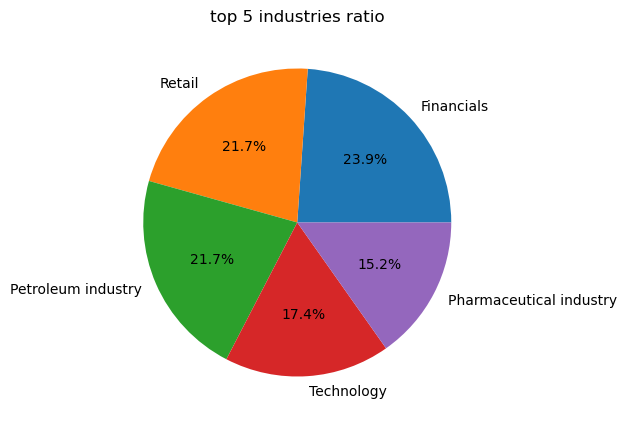

In [33]:
top_5_industry = [11,10,10,8,7]
lst = ['Financials','Retail','Petroleum industry','Technology','Pharmaceutical industry']
plt.figure(figsize=(12,5))
plt.pie(top_5_industry, labels=lst,autopct='%1.1f%%')
plt.title('top 5 industries ratio')
plt.show()

In [34]:
Industry_count=app['Industry'].value_counts()

In [35]:
Industry_count

Financials                          11
Retail                              10
Petroleum industry                  10
Technology                           8
Pharmaceutical industry              7
Healthcare                           6
Insurance                            5
Conglomerate                         4
Telecommunications                   3
Airline                              3
Transportation                       2
Food industry                        2
Health Insurance                     2
Financial                            2
Food Processing                      2
Chemical industry                    1
Petroleum industry and Logistics     1
Machinery                            1
Agriculture manufacturing            1
Aerospace and Defense                1
Telecom Hardware Manufacturing       1
Agriculture cooperative              1
Apparel                              1
Infotech                             1
Automotive and Energy                1
Aerospace and defense    

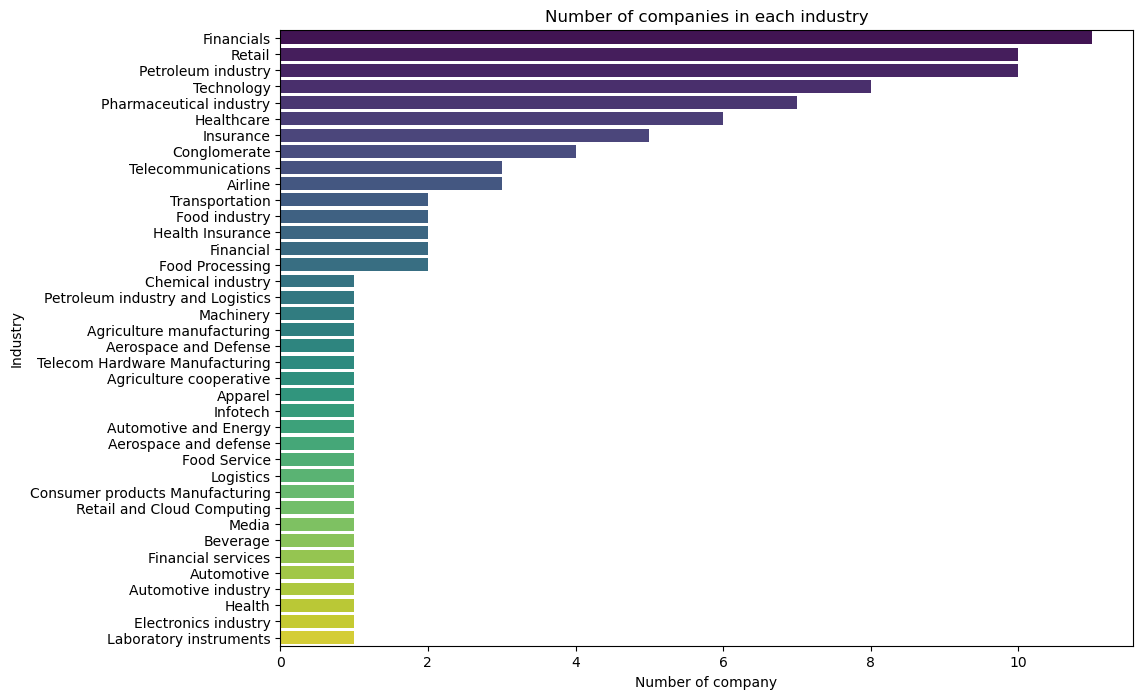

In [36]:
#count the number of comapnies in each industry
plt.figure(figsize=(11,8))
sns.barplot(x=Industry_count.values, y=Industry_count.index, palette = 'viridis')
plt.title('Number of companies in each industry')
plt.xlabel('Number of company')
plt.ylabel('Industry')
plt.show()
##where i can use color='red' and where palette=viridis

#highest number of campanies exist in financials industry and in retail industry


how can analyze revenue growth

In [37]:
#sort the revenue growth
rev_grow=app.sort_values(by='Revenue growth', ascending=False)
rev_grow.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees
65,66,TD Synnex,Infotech,62344,97.2,28500
71,72,World Fuel Services,Petroleum industry and Logistics,59043,88.4,5214
97,98,United Airlines,Airline,44955,82.5,92795
93,94,PBF Energy,Petroleum industry,46830,71.8,3616
48,49,ConocoPhillips,Petroleum industry,82156,69.9,9500


In [38]:
revgrowth_top15=rev_grow.head(15)
revgrowth_top15

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees
65,66,TD Synnex,Infotech,62344,97.2,28500
71,72,World Fuel Services,Petroleum industry and Logistics,59043,88.4,5214
97,98,United Airlines,Airline,44955,82.5,92795
93,94,PBF Energy,Petroleum industry,46830,71.8,3616
48,49,ConocoPhillips,Petroleum industry,82156,69.9,9500
86,87,Delta Air Lines,Airline,50582,69.2,95000
90,91,American Airlines,Airline,48971,63.9,129700
92,93,Performance Food Group,Food Processing,47194,61.6,34825
17,18,Valero Energy,Petroleum industry,171189,58.0,9743
60,61,StoneX Group,Financials,66036,55.3,305


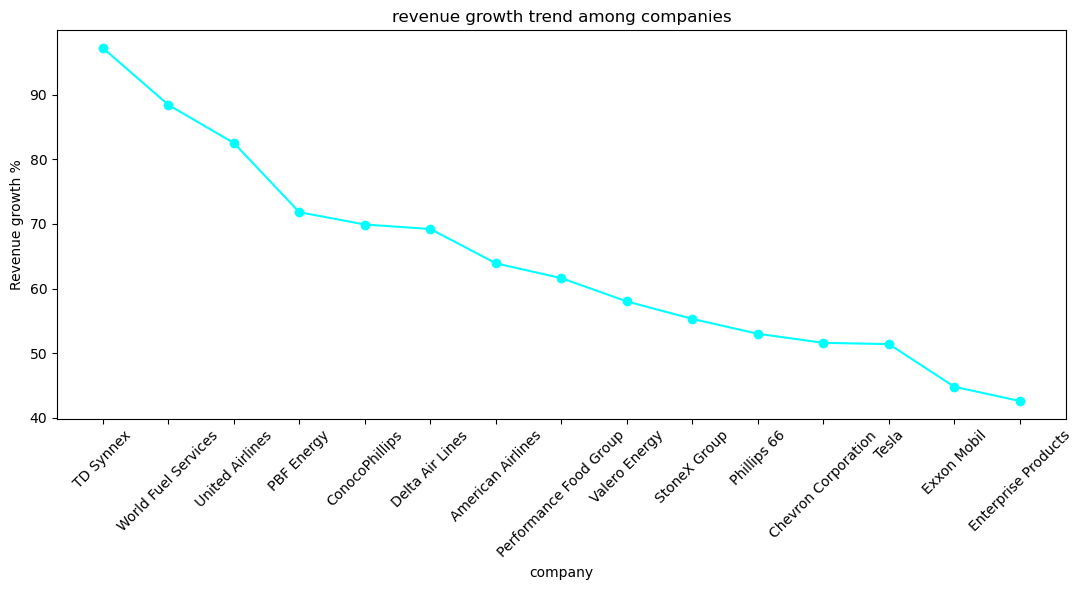

In [39]:
#we use line plot to visualise revenue growth trend
plt.figure(figsize=(11,6))
plt.plot(revgrowth_top15['Name'], revgrowth_top15['Revenue growth'], marker='o', color='cyan',linestyle='-')
plt.title('revenue growth trend among companies')
plt.xlabel('company')
plt.ylabel('Revenue growth %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

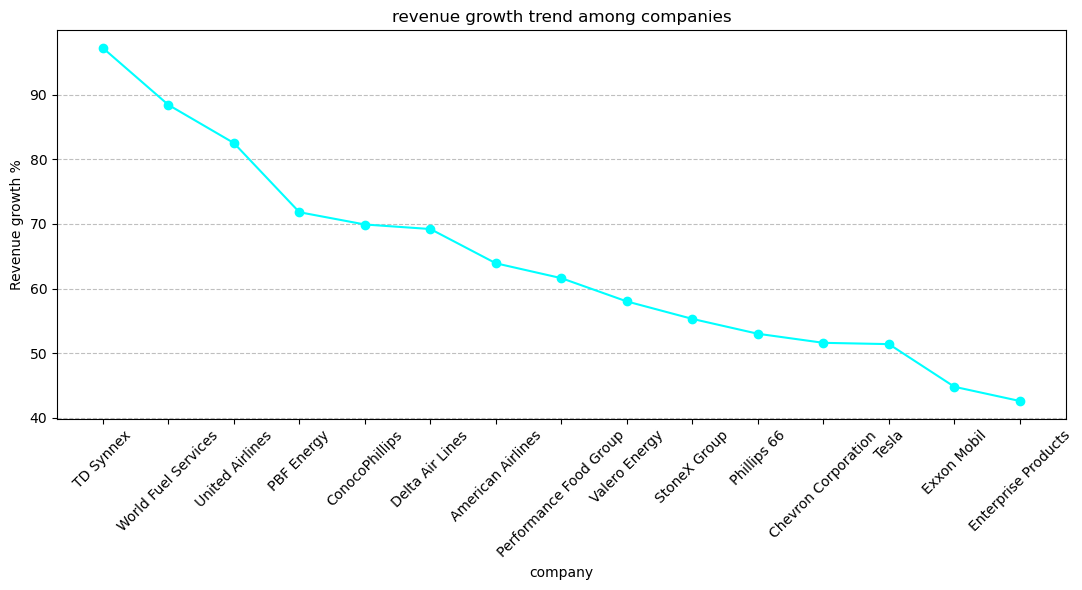

In [40]:
plt.figure(figsize=(11,6))
plt.plot(revgrowth_top15['Name'], revgrowth_top15['Revenue growth'], marker='o', color='cyan',linestyle='-')
plt.title('revenue growth trend among companies')
plt.xlabel('company')
plt.ylabel('Revenue growth %')
plt.grid(True, axis='y',linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

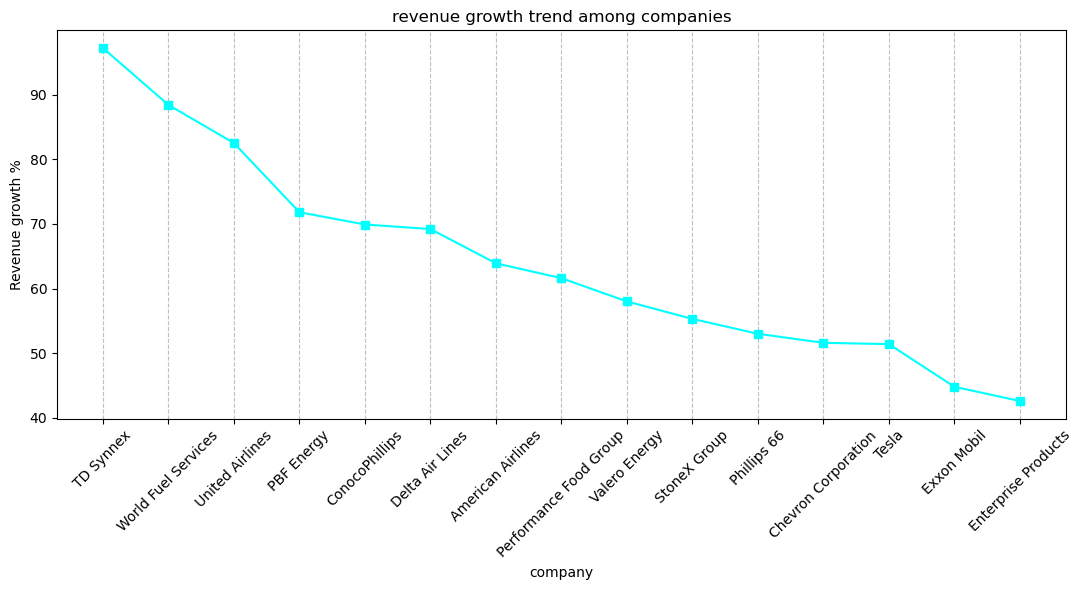

In [41]:
plt.figure(figsize=(11,6))
plt.plot(revgrowth_top15['Name'], revgrowth_top15['Revenue growth'], marker='s', color='cyan',linestyle='-')
plt.title('revenue growth trend among companies')
plt.xlabel('company')
plt.ylabel('Revenue growth %')
plt.grid(True, axis='x',linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
app.head(10)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees
0,1,Walmart,Retail,611289,6.7,2100000
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000
3,4,Apple,Electronics industry,394328,7.8,164000
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000
5,6,CVS Health,Healthcare,322467,10.4,259500
6,7,Berkshire Hathaway,Conglomerate,302089,9.4,383000
7,8,Alphabet,Technology,282836,9.8,156000
8,9,McKesson Corporation,Health,276711,4.8,48500
9,10,Chevron Corporation,Petroleum industry,246252,51.6,43846


In [43]:
employees=app.Employees.head(10)
employees

0    2100000
1    1540000
2      62000
3     164000
4     400000
5     259500
6     383000
7     156000
8      48500
9      43846
Name: Employees, dtype: int32

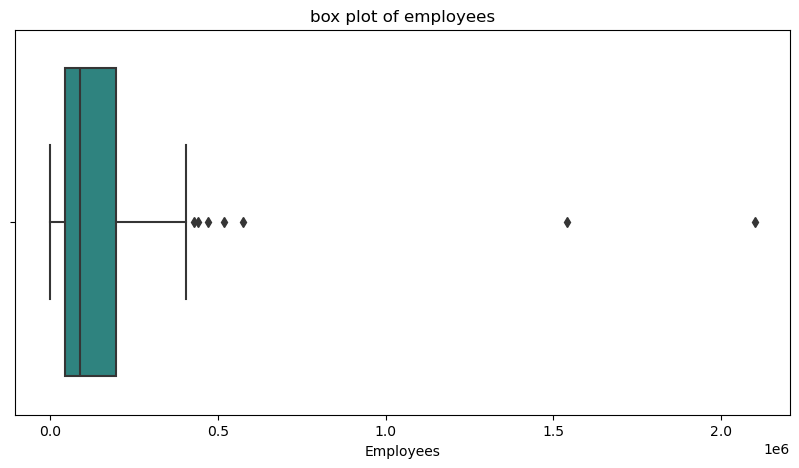

In [44]:
#box plot for employees
plt.figure(figsize=(10,5))
sns.boxplot(x= app['Employees'], palette='viridis')
plt.title('box plot of employees')
plt.show()

In [45]:
#correlation analysis
correlation_app=app[['Revenue (USD millions)','Employees']]

In [46]:
correlation_app.head()

,Revenue (USD millions),Employees
0,611289,2100000
1,513983,1540000
2,413680,62000
3,394328,164000
4,324162,400000


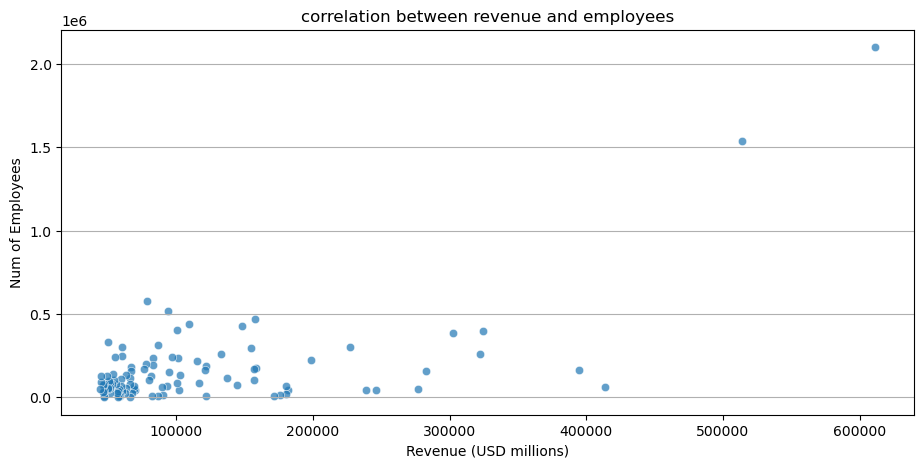

In [47]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='Revenue (USD millions)', y='Employees', data=correlation_app, alpha=0.7)
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Num of Employees')
plt.title('correlation between revenue and employees')
plt.grid(True, axis='y')
plt.show()